# Metropolitan Transportation Authority Data Analysis

## Introduction

> A lot of people in New York using The Metropolitan Transportation subways as main way for transportation. The MTA says that it is serving a population of 15.3 million people across a 5,000-square-mile travel area surrounding New York City through Long Island, southeastern New York State, and Connecticut.Therefore, a huge amount of people causing traffic on stations which is the important factor for us as coffee shop owners who aims to open a coffee shop at one of the MTA stations, but firstly each coffee shop owner shall measure the decision of opening a coffee shop, that is, by posting some ads to notice the intrests of customers and how effective the posters are.

## Proplem

> As coffee shop owners who have limited budget, we want first to measure the decision of opening a coffee shop at one of the MTA stations whether is good and profitable idea or not, in order to do that, we need to post some ads at the stations but we do not want to waiste and utilize huge amount of money on ads posters. However, we want to use few amounts of ads in which it can be affective and attractive to the targeted customers.

## Solution

> I decided to utilize a solution that hopefully will help coffee shop owners targeting the suitable stations for posting the ads. To do so, I willl be investigating and analyzing the MTA data to see which station are the busiest and most crowded, also, I want to measure COVID-19 effect on the Metropolitan Transportation stations in order to know 
how to deal with related phenomena while opening the coffee shop in the future.

**I will use the Metropolitan Transportation Authority dataset which i acquired from their website: http://web.mta.info/developers/turnstile.html
The MTA data records are weekly produced and mainly collected 
every 4 hours.
To carry out the insights, I will use the data of six months starting from October 2020 
until March 2021.**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates

%matplotlib inline

**Acquiring the data**

In [88]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [201003, 201114, 201212, 210116, 210213, 210313]

df = get_data(week_nums)

In [89]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,00:00:00,REGULAR,7463495,2538694
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,04:00:00,REGULAR,7463500,2538697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,08:00:00,REGULAR,7463516,2538712
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,12:00:00,REGULAR,7463552,2538767
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,16:00:00,REGULAR,7463664,2538795


In [90]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259156 entries, 0 to 209316
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1259156 non-null  object
 1   UNIT                                                                  1259156 non-null  object
 2   SCP                                                                   1259156 non-null  object
 3   STATION                                                               1259156 non-null  object
 4   LINENAME                                                              1259156 non-null  object
 5   DIVISION                                                              1259156 non-null  object
 6   DATE                                                                  1259156 non-n

<ipython-input-90-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [91]:
df.shape

(1259156, 11)

**Remove spaces from columns name**

In [92]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

**Check Duplicates rows**

In [93]:
duplicate = (df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME", "DESC"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))


count = duplicate[duplicate["ENTRIES"] > 1].ENTRIES.count()
print(f"We have {count} duplicated rows")
duplicate[duplicate["ENTRIES"] > 1].head()

We have 0 duplicated rows


,C/A,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES


In [94]:
df.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

We don't have nulls in our dataset which is good.

In [95]:
df.describe()

,ENTRIES,EXITS
count,1.259156e+06,1.259156e+06
mean,4.241209e+07,3.454322e+07
std,2.186058e+08,1.969477e+08
min,0.000000e+00,0.000000e+00
25%,2.366328e+05,9.697475e+04
50%,1.579856e+06,9.417745e+05
75%,6.219644e+06,4.105168e+06
max,2.128743e+09,2.123181e+09


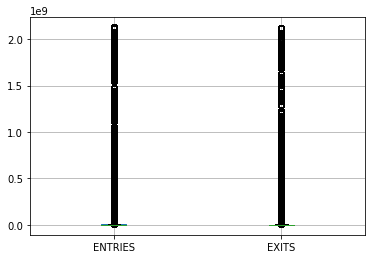

In [99]:
boxplot = df.boxplot(column=['ENTRIES', 'EXITS'])

In [41]:
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [42]:
#convert date, time columns to datetime type and merge them to 1 column (DATE/TIME)
df['DATE/TIME'] =pd.to_datetime(df.DATE+" "+ df.TIME)

**After viewing and studying the dataset we figure out the following:**
- Turnstile count is recorded in a cumulative manner, indicating that data recorded increases constantly over time.
- Dataset does not include day of the week (e.g. Saturday)
- No fixed time is recorded; this makes it hard to compute the data on time intervals for further data analysis.

Therefore, we will create new columns for those values.

In [43]:
#creating day of week (DOW)
import datetime
df['DOW'] = df[['DATE/TIME']]\
    .apply(lambda x: datetime.datetime.strftime(x['DATE/TIME'], '%A'), axis=1)

In [44]:
df.sample(7)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE/TIME,DOW
99307,N501,R020,01-06-00,47-50 STS ROCK,BDFM,IND,12/10/2020,23:00:00,REGULAR,43634,20329,2020-12-10 23:00:00,Thursday
34694,H014,R249,00-00-00,GRAHAM AV,L,BMT,11/11/2020,23:00:00,REGULAR,2164161,12764617,2020-11-11 23:00:00,Wednesday
203433,R612,R057,01-03-06,ATL AV-BARCLAY,BDNQR2345,IRT,09/30/2020,08:00:00,REGULAR,3195602,2098429,2020-09-30 08:00:00,Wednesday
73553,N185,R417,00-00-01,BEACH 98 ST,AS,IND,12/09/2020,20:00:00,REGULAR,1589338,1749339,2020-12-09 20:00:00,Wednesday
206814,R727,R430,00-00-01,PELHAM PKWY,5,IRT,03/08/2021,20:00:00,REGULAR,436858374,184862436,2021-03-08 20:00:00,Monday
124804,PTH16,R550,01-01-06,LACKAWANNA,1,PTH,11/09/2020,17:01:06,REGULAR,247675,155750,2020-11-09 17:01:06,Monday
166985,R248,R178,00-00-04,77 ST,6,IRT,01/13/2021,16:00:00,REGULAR,17998276,4680539,2021-01-13 16:00:00,Wednesday


In [61]:
#get unique values for each column in the dataframe
print(df.apply(lambda col: col.unique()))

C/A          [A002, A006, A007, A010, A011, A013, A014, A01...
UNIT         [R051, R079, R080, R081, R032, R022, R023, R08...
SCP          [02-00-00, 02-00-01, 02-03-00, 02-03-01, 02-03...
STATION      [59 ST, 5 AV/59 ST, 57 ST-7 AV, 49 ST, TIMES S...
LINENAME     [NQR456W, NQRW, ACENQRS1237W, BDFMNQRW, NRW, L...
DIVISION                        [BMT, IND, PTH, IRT, SRT, RIT]
DATE         [09/26/2020, 09/27/2020, 09/28/2020, 09/29/202...
TIME         [00:00:00, 04:00:00, 08:00:00, 12:00:00, 16:00...
DESC                                     [REGULAR, RECOVR AUD]
ENTRIES      [7463495, 7463500, 7463516, 7463552, 7463664, ...
EXITS        [2538694, 2538697, 2538712, 2538767, 2538795, ...
DATE/TIME    [2020-09-26T00:00:00.000000000, 2020-09-26T04:...
DOW          [Saturday, Sunday, Monday, Tuesday, Wednesday,...
dtype: object


In [63]:
df = df.sort_values(["C/A", "UNIT", "SCP", "STATION","DATE/TIME"])
df = df.reset_index(drop=True)

In [71]:
dfgroup=df.groupby(["C/A", "UNIT", "SCP", "STATION"])
df["ENTRIES_NUM"]=dfgroup["ENTRIES"].transform(pd.Series.diff)
df["EXITS_NUM"]=dfgroup["EXITS"].transform(pd.Series.diff)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE/TIME,DOW,ENTRY_DIFF,EXIT_DIFF,ENTRY_NUM,EXIT_NUM,ENTRIES_NUM,EXITS_NUM
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,00:00:00,REGULAR,7463495,2538694,2020-09-26 00:00:00,Saturday,NaN,NaN,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,04:00:00,REGULAR,7463500,2538697,2020-09-26 04:00:00,Saturday,5.0,3.0,5.0,3.0,5.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,08:00:00,REGULAR,7463516,2538712,2020-09-26 08:00:00,Saturday,16.0,15.0,16.0,15.0,16.0,15.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,12:00:00,REGULAR,7463552,2538767,2020-09-26 12:00:00,Saturday,36.0,55.0,36.0,55.0,36.0,55.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,16:00:00,REGULAR,7463664,2538795,2020-09-26 16:00:00,Saturday,112.0,28.0,112.0,28.0,112.0,28.0


In [72]:
#drop the null values
df.dropna(subset=["ENTRIES_NUM","EXITS_NUM"], axis=0, inplace = True)

In [74]:
#Remove any rows of negative ENTRIES and EXITS
df=df[(df.ENTRIES_NUM>=0) & (df.EXITS_NUM>=0)]

In [78]:
df.sample(3)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE/TIME,DOW,ENTRIES_NUM,EXITS_NUM
345122,N072,R012,05-03-06,34 ST-PENN STA,ACE,IND,01/15/2021,23:00:00,REGULAR,1563361,933099,2021-01-15 23:00:00,Friday,22.0,47.0
634600,N528,R257,01-00-02,EAST BROADWAY,F,IND,02/09/2021,03:00:00,REGULAR,6716272,1985856,2021-02-09 03:00:00,Tuesday,1.0,3.0
523877,N329A,R201,01-00-01,WOODHAVEN BLVD,MR,IND,09/30/2020,17:00:00,REGULAR,212877,109500,2020-09-30 17:00:00,Wednesday,156.0,124.0


In [77]:
df.drop(['EXIT_DIFF', 'ENTRY_DIFF','ENTRY_NUM', 'EXIT_NUM'], axis='columns', inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [79]:
#create a column for the total traffic (ENTRIES_NUM + EXITS_NUM)
df['TOTAL_TRAFFIC'] = df['ENTRIES_NUM'].values + df['EXITS_NUM'].values

<ipython-input-79-e86849f0c8b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL_TRAFFIC'] = df['ENTRIES_NUM'].values + df['EXITS_NUM'].values


In [80]:
df.sample(4)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE/TIME,DOW,ENTRIES_NUM,EXITS_NUM,TOTAL_TRAFFIC
686249,N605,R024,00-05-00,SUTPHIN-ARCHER,EJZ,IND,12/07/2020,07:00:00,REGULAR,33557030,16777216,2020-12-07 07:00:00,Monday,0.0,0.0,0.0
820345,R122,R290,02-05-01,HOUSTON ST,1,IRT,01/14/2021,20:00:00,REGULAR,327680,1,2021-01-14 20:00:00,Thursday,0.0,0.0,0.0
810100,R114,R028,02-00-03,FULTON ST,2345ACJZ,IRT,03/09/2021,14:00:00,REGULAR,1178597,2580427,2021-03-09 14:00:00,Tuesday,16.0,54.0,70.0
507515,N318,R298,00-00-01,NORTHERN BLVD,MR,IND,11/08/2020,00:00:00,REGULAR,7731099,2332318,2020-11-08 00:00:00,Sunday,18.0,15.0,33.0


In [86]:
df.head(-40)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE/TIME,DOW,ENTRIES_NUM,EXITS_NUM,TOTAL_TRAFFIC
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,04:00:00,REGULAR,7463500,2538697,2020-09-26 04:00:00,Saturday,5.0,3.0,8.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,08:00:00,REGULAR,7463516,2538712,2020-09-26 08:00:00,Saturday,16.0,15.0,31.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,12:00:00,REGULAR,7463552,2538767,2020-09-26 12:00:00,Saturday,36.0,55.0,91.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,16:00:00,REGULAR,7463664,2538795,2020-09-26 16:00:00,Saturday,112.0,28.0,140.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,20:00:00,REGULAR,7463799,2538810,2020-09-26 20:00:00,Saturday,135.0,15.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259111,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/12/2021,12:00:00,REGULAR,5554,544,2021-02-12 12:00:00,Friday,0.0,0.0,0.0
1259112,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/12/2021,16:00:00,REGULAR,5554,544,2021-02-12 16:00:00,Friday,0.0,0.0,0.0
1259113,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,02/12/2021,20:00:00,REGULAR,5554,544,2021-02-12 20:00:00,Friday,0.0,0.0,0.0
1259114,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/06/2021,00:00:00,REGULAR,5554,544,2021-03-06 00:00:00,Saturday,0.0,0.0,0.0


ValueError: could not convert string to float: '1 AV'

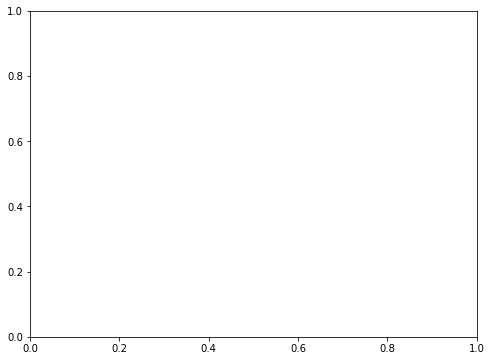

In [81]:

group_station = df.groupby('STATION')['TOTAL_TRAFFIC']
fig1 = plt.figure(figsize=[8,6])
ax1 = sns.distplot(group_station,bins=50,kde=False)